### 🧪 Análisis de Datos ML - Sistema de Ventas Tienda Aurelion

Este proyecto realiza un análisis integral de ventas para transformar datos transaccionales en conocimiento accionable. El objetivo principal es segmentar clientes e interpretar patrones de compra mediante técnicas de Machine Learning, optimizando así la toma de decisiones estratégicas y operativas.

El modelado usó Regresión para predecir ventas, Clasificación para identificar transacciones de alto valor, y Clustering K-Means para segmentar clientes por métricas RFM.

### 1. Importar librerias necesarias

In [ ]:
# Importar bibliotecas para manipulación de datos
import polars as pl
import pandas as pd # Se incluye como respaldo o para funciones específicas

# Importar bibliotecas para visualización
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importar bibliotecas para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Importar bibliotecas para tareas generales y matemáticas
import numpy as np


### 2. Cargamos los datos

In [3]:
file_path = "datos_exportados/ventas_procesadas.csv" # Ruta al archivo CSV procesado
data = pd.read_csv(file_path)

In [4]:
data

,id_detalle,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe,fecha,id_cliente,nombre_cliente,...,medio_pago,nombre_producto_right,categoria,precio_unitario_right,nombre_cliente_right,email_right,ciudad,fecha_alta,ingreso_total,precio_promedio
0,1,1.0,90.0,Toallas Húmedas x50,1.0,2902.0,2902.0,2024-06-19T00:00:00.000000000,62.0,Guadalupe Romero,...,tarjeta,Toallas Húmedas x50,Limpieza,2902.0,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03T00:00:00.000000000,2902.0,2902.0
1,2,2.0,82.0,Aceitunas Negras 200g,5.0,2394.0,11970.0,2024-03-17T00:00:00.000000000,49.0,Olivia Gomez,...,qr,Aceitunas Negras 200g,Limpieza,2394.0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18T00:00:00.000000000,11970.0,2394.0
2,3,2.0,39.0,Helado Vainilla 1L,5.0,469.0,2345.0,2024-03-17T00:00:00.000000000,49.0,Olivia Gomez,...,qr,Helado Vainilla 1L,Alimentos,469.0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18T00:00:00.000000000,2345.0,469.0
3,4,2.0,70.0,Fernet 750ml,2.0,4061.0,8122.0,2024-03-17T00:00:00.000000000,49.0,Olivia Gomez,...,qr,Fernet 750ml,Limpieza,4061.0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18T00:00:00.000000000,8122.0,4061.0
4,5,2.0,22.0,Medialunas de Manteca,1.0,2069.0,2069.0,2024-03-17T00:00:00.000000000,49.0,Olivia Gomez,...,qr,Medialunas de Manteca,Limpieza,2069.0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18T00:00:00.000000000,2069.0,2069.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,118.0,70.0,Fernet 750ml,2.0,4061.0,8122.0,2024-02-09T00:00:00.000000000,84.0,Pablo Sanchez,...,efectivo,Fernet 750ml,Limpieza,4061.0,Pablo Sanchez,pablo.sanchez@mail.com,Cordoba,2023-03-25T00:00:00.000000000,8122.0,4061.0
339,340,118.0,93.0,Cepillo de Dientes,3.0,2142.0,6426.0,2024-02-09T00:00:00.000000000,84.0,Pablo Sanchez,...,efectivo,Cepillo de Dientes,Alimentos,2142.0,Pablo Sanchez,pablo.sanchez@mail.com,Cordoba,2023-03-25T00:00:00.000000000,6426.0,2142.0
340,341,118.0,50.0,Azúcar 1kg,2.0,727.0,1454.0,2024-02-09T00:00:00.000000000,84.0,Pablo Sanchez,...,efectivo,Azúcar 1kg,Limpieza,727.0,Pablo Sanchez,pablo.sanchez@mail.com,Cordoba,2023-03-25T00:00:00.000000000,1454.0,727.0
341,342,119.0,45.0,Fideos Spaghetti 500g,5.0,745.0,3725.0,2024-02-07T00:00:00.000000000,51.0,Agustina Gomez,...,qr,Fideos Spaghetti 500g,Alimentos,745.0,Agustina Gomez,agustina.gomez@mail.com,Rio Cuarto,2023-02-20T00:00:00.000000000,3725.0,745.0


### 3. Limpieza y Preparación Inicial de datos

3.1 Gestion de columnas duplicadas

In [5]:
# 1. Gestión de Columnas Redundantes/Duplicadas
print("--- 3.1 Gestión de Columnas Redundantes/Duplicadas ---")
columnas_a_eliminar = [col for col in data.columns if col.endswith('_right')]
data = data.drop(columns=columnas_a_eliminar)
print(f"Columnas eliminadas (redundantes): {columnas_a_eliminar}")
print("-" * 50)

--- 3.1 Gestión de Columnas Redundantes/Duplicadas ---
Columnas eliminadas (redundantes): ['nombre_producto_right', 'precio_unitario_right', 'nombre_cliente_right', 'email_right']
--------------------------------------------------


3.2 Inspección de valores faltantes

In [6]:
# 2. Inspección de Valores Faltantes (Nulos)
print("--- 3.2 Inspección de Valores Faltantes (Nulos) ---")
nulos = data.isnull().sum()
nulos_data = nulos[nulos > 0] # Filtra solo las que tienen nulos

if nulos_data.empty:
    print("¡Genial! No se encontraron valores nulos en el DataFrame.")
else:
    print("Columnas con Valores Nulos:")
    print(nulos_data)
print("-" * 50)

--- 3.2 Inspección de Valores Faltantes (Nulos) ---
¡Genial! No se encontraron valores nulos en el DataFrame.
--------------------------------------------------


3.3 Convertir tipos de datos

In [7]:
# 3. Conversión de Tipos de Datos (Fechas)
print("--- 3.3 Conversión de Tipos de Datos (Fechas) ---")

# Convertimos las columnas de fecha a Datetime y les asignamos nuevos nombres
data['fecha_venta'] = pd.to_datetime(data['fecha'], errors='coerce')
data['fecha_alta_cliente'] = pd.to_datetime(data['fecha_alta'], errors='coerce')

# Eliminamos las columnas originales de cadena
data = data.drop(columns=["fecha", "fecha_alta"]) 

print("Tipos de datos después de la limpieza y conversión de fechas:")
data.info()
print("\nPrimeras 2 filas después de la limpieza:")
print(data.head(2).to_markdown(index=False))

--- 3.3 Conversión de Tipos de Datos (Fechas) ---
Tipos de datos después de la limpieza y conversión de fechas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_detalle          343 non-null    int64         
 1   id_venta            343 non-null    float64       
 2   id_producto         343 non-null    float64       
 3   nombre_producto     343 non-null    object        
 4   cantidad            343 non-null    float64       
 5   precio_unitario     343 non-null    float64       
 6   importe             343 non-null    float64       
 7   id_cliente          343 non-null    float64       
 8   nombre_cliente      343 non-null    object        
 9   email               343 non-null    object        
 10  medio_pago          343 non-null    object        
 11  categoria           343 non-null    object        

### 4. Análisis Exploratorio de Datos (EDA) con Plotly

In [8]:
# 4.1 Distribución del Ingreso Total (Histograma)
print("Generando Gráfico 1: Distribución del Ingreso Total...")
fig_ingreso = px.histogram(
    data, 
    x="ingreso_total", 
    nbins=30,
    title="Distribución del Ingreso Total por Venta",
    template="plotly_white"
).update_layout(
    xaxis_title="Ingreso Total ($)", 
    yaxis_title="Frecuencia (Número de Ventas)"
)
fig_ingreso.show() # Muestra el gráfico en el notebook
print("-" * 50)

Generando Gráfico 1: Distribución del Ingreso Total...


--------------------------------------------------


In [9]:
# 4.2 Ventas Agrupadas por Categoría (Gráfico de Barras)
print("Generando Gráfico 2: Ventas por Categoría...")
# Agrupar y sumar el importe total por categoría
data_categoria = data.groupby('categoria')['importe'].sum().reset_index().sort_values(by='importe', ascending=False)

fig_categoria = px.bar(
    data_categoria, 
    x="categoria", 
    y="importe", 
    title="Importe Total Vendido por Categoría",
    template="plotly_white",
    color="importe", 
    color_continuous_scale=px.colors.sequential.Agsunset
).update_layout(
    xaxis_title="Categoría de Producto", 
    yaxis_title="Importe Total Vendido ($)"
)
fig_categoria.show() # Muestra el gráfico en el notebook

Generando Gráfico 2: Ventas por Categoría...


In [10]:
# 4.3 Ventas Agrupadas por Medio de Pago (Gráfico Circular)
print("Generando Gráfico 3: Ventas por Medio de Pago...")
# Agrupar y sumar el importe total por medio de pago
data_pago = data.groupby('medio_pago')['importe'].sum().reset_index().sort_values(by='importe', ascending=False)

fig_pago = px.pie(
    data_pago, 
    names='medio_pago', 
    values='importe', 
    title='Proporción de Importe Total por Medio de Pago',
    template="plotly_white"
).update_traces(
    textinfo='percent+label', 
    # Destaca el sector con el valor más alto
    pull=[0.05 if x == data_pago['importe'].max() else 0 for x in data_pago['importe']] 
)
fig_pago.show() # Muestra el gráfico en el notebook

Generando Gráfico 3: Ventas por Medio de Pago...


### 5. Análisis Cruzado (EDA Avanzado)

In [11]:
print("--- 5.1 Importe Promedio por Categoría y Ciudad ---")

# Agrupar por categoría y ciudad, y calcular el importe promedio (valor promedio de la venta)
data_cruzado_ciudad = data.groupby(['categoria', 'ciudad'])['importe'].mean().reset_index()
data_cruzado_ciudad.rename(columns={'importe': 'importe_promedio'}, inplace=True)

# Crear un gráfico de barras agrupadas o un mapa de calor (Heatmap)
# Usaremos un gráfico de barras agrupadas para este caso
fig_cruzado_ciudad = px.bar(
    data_cruzado_ciudad,
    x="categoria",
    y="importe_promedio",
    color="ciudad",
    barmode="group", # Agrupa las barras por categoría
    title="Importe Promedio por Venta: Categoría vs. Ciudad",
    template="plotly_white",
    hover_data={'importe_promedio': ':.2f'} # Formato de 2 decimales en el tooltip
).update_layout(
    xaxis_title="Categoría",
    yaxis_title="Importe Promedio de Venta ($)"
)
fig_cruzado_ciudad.show()

--- 5.1 Importe Promedio por Categoría y Ciudad ---


In [12]:
print("--- 5.2 Evolución Temporal de las Ventas ---")

# 1. Extraer la fecha (sin hora) y agrupar
data['fecha_dia'] = data['fecha_venta'].dt.date
data_temporal = data.groupby('fecha_dia')['importe'].sum().reset_index()
data_temporal['fecha_dia'] = pd.to_datetime(data_temporal['fecha_dia']) # Convertir de nuevo a datetime para Plotly

# 2. Visualización con Gráfico de Líneas
fig_tiempo = px.line(
    data_temporal,
    x="fecha_dia",
    y="importe",
    title="Evolución del Importe Total de Ventas a lo largo del Tiempo",
    template="plotly_white"
).update_layout(
    xaxis_title="Fecha",
    yaxis_title="Importe Total Diario ($)"
).update_xaxes(
    rangeslider_visible=True # Permite hacer zoom en el eje X
)
fig_tiempo.show()

--- 5.2 Evolución Temporal de las Ventas ---


In [13]:
print("--- 5.3 Importe por Cliente vs. Antigüedad del Cliente ---")

# 1. Feature Engineering: Calcular la antigüedad del cliente en días al momento de la venta
fecha_maxima = data['fecha_venta'].max() # Usaremos la fecha de la última venta como referencia para la antigüedad.
data['antiguedad_dias'] = (fecha_maxima - data['fecha_alta_cliente']).dt.days

# 2. Agrupar por cliente para obtener el importe total y la antigüedad promedio
data_cliente = data.groupby('id_cliente').agg(
    importe_total=('importe', 'sum'),
    antiguedad_promedio=('antiguedad_dias', 'mean')
).reset_index()

# 3. Gráfico de dispersión (Scatter Plot)
fig_cliente = px.scatter(
    data_cliente,
    x="antiguedad_promedio",
    y="importe_total",
    size="importe_total", # Tamaño del punto basado en el importe total
    hover_name="id_cliente",
    title="Relación entre Importe Total Gastado y Antigüedad del Cliente",
    template="plotly_white"
).update_layout(
    xaxis_title="Antigüedad del Cliente (días)",
    yaxis_title="Importe Total Gastado por Cliente ($)"
)
fig_cliente.show()

--- 5.3 Importe por Cliente vs. Antigüedad del Cliente ---


### 6. Preparación de Datos para Machine Learning

In [14]:
print("--- 6.1 Ingeniería de Características (Feature Engineering) ---")

# Variables temporales de la venta (para capturar estacionalidad)
data['mes_venta'] = data['fecha_venta'].dt.month
data['dia_semana_venta'] = data['fecha_venta'].dt.dayofweek # 0=Lunes, 6=Domingo

# Antigüedad del cliente al momento de la venta (ya calculada en el paso anterior, pero la creamos de nuevo para robustez)
data['antiguedad_dias'] = (data['fecha_venta'].max() - data['fecha_alta_cliente']).dt.days

# Drop de columnas originales que ya no se necesitan o son redundantes para el modelo
columnas_a_eliminar_ml = [
    'id_detalle', 'id_venta', 'id_producto', 'id_cliente', 
    'fecha_venta', 'fecha_alta_cliente', # Ya extrajimos información temporal
    'precio_unitario', 'ingreso_total', 'precio_promedio' # Correlacionan fuertemente con 'importe' o son redundantes
]

data_ml = data.drop(columns=columnas_a_eliminar_ml)
print(f"Columnas creadas: 'mes_venta', 'dia_semana_venta', 'antiguedad_dias'")
print(f"Columnas eliminadas: {columnas_a_eliminar_ml}")


--- 6.1 Ingeniería de Características (Feature Engineering) ---
Columnas creadas: 'mes_venta', 'dia_semana_venta', 'antiguedad_dias'
Columnas eliminadas: ['id_detalle', 'id_venta', 'id_producto', 'id_cliente', 'fecha_venta', 'fecha_alta_cliente', 'precio_unitario', 'ingreso_total', 'precio_promedio']


In [15]:
print("--- 6.2 Definición de Variables y Preprocesamiento ---")

# 1. Definir la variable objetivo (Y) y las características (X)
TARGET_VARIABLE = 'importe'
X = data_ml.drop(columns=[TARGET_VARIABLE])
y = data_ml[TARGET_VARIABLE]

# 2. Identificar tipos de columnas para el preprocesamiento
COL_NUMERICAS = X.select_dtypes(include=np.number).columns.tolist()
COL_CATEGORICAS = X.select_dtypes(include='object').columns.tolist()
print(f"Características Numéricas a escalar: {COL_NUMERICAS}")
print(f"Características Categóricas a codificar: {COL_CATEGORICAS}")

--- 6.2 Definición de Variables y Preprocesamiento ---
Características Numéricas a escalar: ['cantidad', 'antiguedad_dias', 'mes_venta', 'dia_semana_venta']
Características Categóricas a codificar: ['nombre_producto', 'nombre_cliente', 'email', 'medio_pago', 'categoria', 'ciudad', 'fecha_dia']


In [16]:
# 3. Crear el Preprocesador (ColumnTransformer)
# Usaremos StandardScaler para las numéricas y OneHotEncoder para las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), COL_NUMERICAS),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), COL_CATEGORICAS)
    ],
    remainder='passthrough' # Mantiene cualquier otra columna (aunque no debería haber ninguna)
)
print("Preprocesador (ColumnTransformer) creado con StandardScaler y OneHotEncoder.")

Preprocesador (ColumnTransformer) creado con StandardScaler y OneHotEncoder.


In [17]:
# 6.3. División de Datos (Entrenamiento y Prueba)
print("--- 6.3 División de Datos (Entrenamiento y Prueba) ---")

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42 # Semilla para reproducibilidad
)

print(f"Tamaño del conjunto original: {data_ml.shape[0]} registros")
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")


--- 6.3 División de Datos (Entrenamiento y Prueba) ---
Tamaño del conjunto original: 343 registros
Tamaño del conjunto de entrenamiento (X_train): (274, 11)
Tamaño del conjunto de prueba (X_test): (69, 11)


### 7. Modelado, Entrenamiento y Evaluación Inicial

In [18]:
# Importar las bibliotecas necesarias para el modelado
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

print("--- 7.1 Creación y Entrenamiento del Pipeline ---")

# 1. Definir el modelo (Random Forest Regressor)
# Usaremos una configuración simple, pero puede optimizarse después (GridSearch/RandomSearch)
rf_model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1, # Usa todos los núcleos disponibles
    max_depth=10 
)

# 2. Crear el Pipeline: Encadenar el preprocesador y el modelo
# 'preprocessor' se creó en el Paso 6
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

# 3. Entrenar el Pipeline
# El .fit() aplica el preprocesamiento (fit_transform) y luego entrena el modelo
print("Iniciando el entrenamiento del modelo Random Forest...")
pipeline.fit(X_train, y_train)
print("Entrenamiento completado.")
print("-" * 50)


--- 7.1 Creación y Entrenamiento del Pipeline ---
Iniciando el entrenamiento del modelo Random Forest...
Entrenamiento completado.
--------------------------------------------------


In [19]:
print("--- 7.2 Predicción y Evaluación ---")

# 1. Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# 2. Calcular las métricas de evaluación para regresión
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # RMSE
r2 = r2_score(y_test, y_pred)

print(f"Métricas de Evaluación en el conjunto de Prueba:")
print(f"  - Error Absoluto Medio (MAE): {mae:,.2f} $")
print(f"  - Raíz del Error Cuadrático Medio (RMSE): {rmse:,.2f} $")
print(f"  - Coeficiente de Determinación (R²): {r2:.4f}")

--- 7.2 Predicción y Evaluación ---
Métricas de Evaluación en el conjunto de Prueba:
  - Error Absoluto Medio (MAE): 2,510.55 $
  - Raíz del Error Cuadrático Medio (RMSE): 3,204.51 $
  - Coeficiente de Determinación (R²): 0.4039


In [20]:
# 3. Visualización de la Importancia de Características
# Esta es una gran ventaja del Random Forest para entender el modelo
# Obtenemos los nombres de las columnas post-preprocesamiento (incluyendo one-hot encoding)
feature_names = pipeline['preprocessor'].get_feature_names_out()
# Obtenemos las importancias
importances = pipeline['regressor'].feature_importances_
# Creamos un DataFrame para visualizarlas
feature_importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False).head(10) # Mostrar las top 10

print("Importancia de las Características (Top 10):")
print(feature_importance_df.to_markdown(index=False))

# Opcional: Visualización con Plotly
fig_importancia = px.bar(
    feature_importance_df,
    x='Importancia',
    y='Característica',
    orientation='h',
    title='Top 10 Características más Importantes para la Predicción de Importe',
    template='plotly_white'
).update_layout(yaxis={'categoryorder':'total ascending'})
fig_importancia.show()

Importancia de las Características (Top 10):
| Característica                                  |   Importancia |
|:------------------------------------------------|--------------:|
| num__cantidad                                   |     0.468786  |
| num__antiguedad_dias                            |     0.0321556 |
| cat__fecha_dia_2024-05-23                       |     0.0257031 |
| cat__nombre_producto_Helado Vainilla 1L         |     0.0253125 |
| cat__nombre_producto_Turrón 50g                 |     0.0223162 |
| cat__nombre_producto_Pizza Congelada Muzzarella |     0.0211011 |
| cat__nombre_producto_Ron 700ml                  |     0.0207161 |
| cat__nombre_producto_Pan Lactal Integral        |     0.0184668 |
| num__dia_semana_venta                           |     0.0176933 |
| cat__nombre_producto_Desodorante Aerosol        |     0.013281  |


### 8. Optimización del Modelo con GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

print("--- 8.1 Definición y Ejecución de GridSearchCV ---")

# 1. Definir la malla de hiperparámetros a probar
# Es crucial usar el prefijo del paso del Pipeline ('regressor__')
param_grid = {
    'regressor__n_estimators': [100, 200, 300], # Número de árboles
    'regressor__max_depth': [5, 10, None],      # Profundidad máxima del árbol
    'regressor__min_samples_split': [2, 5],     # Mínimo de muestras para dividir un nodo
}

# 2. Configurar GridSearchCV
# Usamos el Pipeline completo creado en el paso anterior.
# cv=5: Validación cruzada con 5 pliegues.
# scoring: Usamos el error cuadrático medio negativo (cuanto más cercano a cero, mejor).
grid_search = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, # Usa todos los núcleos
    verbose=1
)

# 3. Ejecutar la búsqueda en los datos de entrenamiento
print("Iniciando la búsqueda de la mejor combinación de hiperparámetros...")
grid_search.fit(X_train, y_train)

print("Búsqueda completada.")
print("-" * 50)




# 5. Comparación (Opcional, si deseas comparar con los resultados del Paso 7)
# Esta comparación te dirá si la optimización valió la pena.
# print(f"Mejora en el R²: {r2_tuned - r2:.4f}")

--- 8.1 Definición y Ejecución de GridSearchCV ---
Iniciando la búsqueda de la mejor combinación de hiperparámetros...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Búsqueda completada.
--------------------------------------------------


In [22]:
# 8.2. Resultados y Evaluación Final
print("--- 8.2 Resultados y Evaluación Final ---")

# 1. Mostrar los mejores parámetros encontrados
print("Mejores Hiperparámetros encontrados:")
print(grid_search.best_params_)

# 2. Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# 3. Realizar predicciones con el modelo optimizado
y_pred_tuned = best_rf_model.predict(X_test)

# 4. Calcular métricas de evaluación final
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"\nMétricas de Evaluación con el Modelo Optimizado:")
print(f"  - Error Absoluto Medio (MAE): {mae_tuned:,.2f} $")
print(f"  - Raíz del Error Cuadrático Medio (RMSE): {rmse_tuned:,.2f} $")
print(f"  - Coeficiente de Determinación (R²): {r2_tuned:.4f}")
print("-" * 50)


--- 8.2 Resultados y Evaluación Final ---
Mejores Hiperparámetros encontrados:
{'regressor__max_depth': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}

Métricas de Evaluación con el Modelo Optimizado:
  - Error Absoluto Medio (MAE): 2,399.11 $
  - Raíz del Error Cuadrático Medio (RMSE): 3,012.46 $
  - Coeficiente de Determinación (R²): 0.4732
--------------------------------------------------


### 9. Definición del Objetivo de Clasificación

In [23]:
# NOVENO PASO: Definición del Objetivo de Clasificación (Targeting)

# 1. Definir la mediana del importe como umbral de Alto/Bajo Valor
umbral_importe = data['importe'].median()
print(f"La mediana del importe (Umbral de Alto Valor) es: {umbral_importe:,.2f} $")

# 2. Crear la variable objetivo binaria 'venta_alto_valor' (TARGET_CLASS)
# 1 = Alto Valor (Importe > Mediana)
# 0 = Bajo Valor (Importe <= Mediana)
data['venta_alto_valor'] = (data['importe'] > umbral_importe).astype(int)

# 3. Mostrar el balance de clases (es crucial en clasificación)
conteo_clases = data['venta_alto_valor'].value_counts()
print("\nConteo de Clases (0: Bajo Valor | 1: Alto Valor):")
print(conteo_clases.to_markdown())

# 4. Asignación de X y Y para Clasificación
TARGET_CLASS = 'venta_alto_valor'

# Reutilizamos las características (X) y eliminamos el importe original
X_class = data.drop(columns=[TARGET_CLASS, 'importe']) 
y_class = data[TARGET_CLASS]

print("-" * 50)
print("Variable objetivo binaria creada. Listo para el preprocesamiento de clasificación.")

La mediana del importe (Umbral de Alto Valor) es: 6,702.00 $

Conteo de Clases (0: Bajo Valor | 1: Alto Valor):
|   venta_alto_valor |   count |
|-------------------:|--------:|
|                  0 |     172 |
|                  1 |     171 |
--------------------------------------------------
Variable objetivo binaria creada. Listo para el preprocesamiento de clasificación.


### 10. Preprocesamiento y División de Datos (Clasificación)

In [24]:
# DÉCIMO PASO: Preprocesamiento y División de Datos para Clasificación

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

print("--- 10.1 Reajuste de Características y Columnas ---")

# Recreamos el DataFrame de características eliminando las mismas columnas del paso de regresión
columnas_a_eliminar_ml = [
    'id_detalle', 'id_venta', 'id_producto', 'id_cliente', 
    'fecha_venta', 'fecha_alta_cliente', # Ya extrajimos información temporal
    # Note que 'importe' ya fue quitada en el Paso 9 para ser la variable objetivo (Y)
    'precio_unitario', 'ingreso_total', 'precio_promedio' # Redundantes
]
X_class = X_class.drop(columns=columnas_a_eliminar_ml)

# 1. Identificar tipos de columnas para el preprocesamiento (Mismas que en el Paso 6)
COL_NUMERICAS = X_class.select_dtypes(include=np.number).columns.tolist()
COL_CATEGORICAS = X_class.select_dtypes(include='object').columns.tolist()


print("--- 10.2 Creación y Aplicación del Preprocesador ---")

# Recreamos el Preprocesador (ColumnTransformer) por si se perdió la variable global
preprocessor_class = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), COL_NUMERICAS),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), COL_CATEGORICAS)
    ],
    remainder='passthrough'
)
print("Preprocesador (ColumnTransformer) recreado.")


print("--- 10.3 División de Datos (Entrenamiento y Prueba) ---")

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
# Usamos stratify=y_class para mantener el balance de clases en ambos conjuntos
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_class # Clave para clasificación
)

print(f"Tamaño del conjunto de entrenamiento (X_train_c): {X_train_c.shape}")
print(f"Tamaño del conjunto de prueba (X_test_c): {X_test_c.shape}")

--- 10.1 Reajuste de Características y Columnas ---
--- 10.2 Creación y Aplicación del Preprocesador ---
Preprocesador (ColumnTransformer) recreado.
--- 10.3 División de Datos (Entrenamiento y Prueba) ---
Tamaño del conjunto de entrenamiento (X_train_c): (274, 11)
Tamaño del conjunto de prueba (X_test_c): (69, 11)


### 11. Modelado, Entrenamiento y Evaluación (Clasificación)

--- 11.1 Creación y Entrenamiento del Pipeline de Clasificación ---
Iniciando el entrenamiento del modelo Random Forest Classifier...
Entrenamiento completado.
--------------------------------------------------
--- 11.2 Predicción y Evaluación de Clasificación ---
Métricas de Evaluación en el conjunto de Prueba:
  - Accuracy: 0.7536
  - F1-Score: 0.7385

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.77      0.71      0.74        34

    accuracy                           0.75        69
   macro avg       0.76      0.75      0.75        69
weighted avg       0.76      0.75      0.75        69

--------------------------------------------------
Generando Matriz de Confusión...


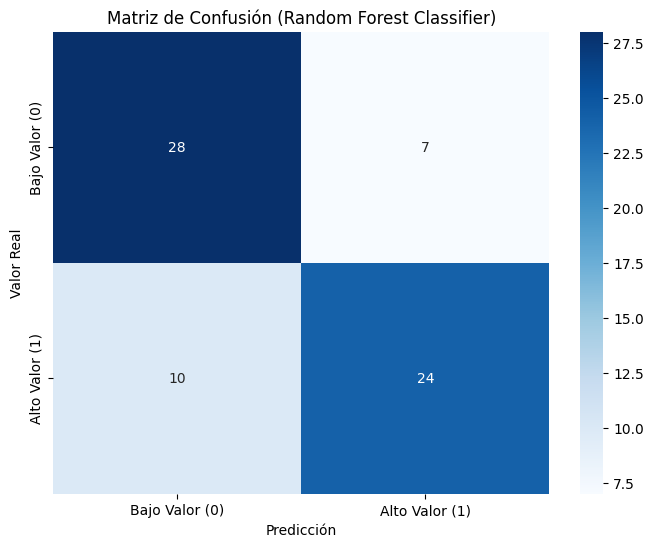

Análisis de Clasificación Completado.


In [25]:
# Importar las bibliotecas necesarias para clasificación
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

print("--- 11.1 Creación y Entrenamiento del Pipeline de Clasificación ---")

# 1. Definir el modelo (Random Forest Classifier)
rf_classifier = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1,
    class_weight='balanced' # Útil si hay desbalance (aunque aquí es ~50/50)
)

# 2. Crear el Pipeline: Encadenar el preprocesador y el clasificador
pipeline_class = Pipeline(steps=[
    ('preprocessor', preprocessor_class),
    ('classifier', rf_classifier)
])

# 3. Entrenar el Pipeline
print("Iniciando el entrenamiento del modelo Random Forest Classifier...")
pipeline_class.fit(X_train_c, y_train_c)
print("Entrenamiento completado.")
print("-" * 50)


print("--- 11.2 Predicción y Evaluación de Clasificación ---")

# 1. Realizar predicciones en el conjunto de prueba
y_pred_c = pipeline_class.predict(X_test_c)

# 2. Calcular las métricas de clasificación
accuracy = accuracy_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
reporte = classification_report(y_test_c, y_pred_c)
matriz = confusion_matrix(y_test_c, y_pred_c)

print(f"Métricas de Evaluación en el conjunto de Prueba:")
print(f"  - Accuracy: {accuracy:.4f}")
print(f"  - F1-Score: {f1:.4f}")
print("\nReporte de Clasificación:")
print(reporte)

print("-" * 50)


# 3. Visualización de la Matriz de Confusión
print("Generando Matriz de Confusión...")
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Bajo Valor (0)', 'Alto Valor (1)'], 
    yticklabels=['Bajo Valor (0)', 'Alto Valor (1)']
)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Random Forest Classifier)')
plt.show() 
print("Análisis de Clasificación Completado.")

### 12. Optimización del Clasificador con GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

print("--- 12.1 Definición y Ejecución de GridSearchCV para Clasificación ---")

# 1. Definir la malla de hiperparámetros a probar para el clasificador
# Usamos el prefijo del paso del Pipeline ('classifier__')
param_grid_class = {
    'classifier__n_estimators': [100, 250],      # Número de árboles
    'classifier__max_depth': [5, 10],            # Profundidad máxima del árbol
    'classifier__min_samples_split': [2, 5],     # Mínimo de muestras para dividir
    'classifier__class_weight': ['balanced']     # Mantenemos el peso de clase para robustez
}

# 2. Configurar GridSearchCV
# Scoring: Usamos 'f1' para maximizar la media armónica de precisión y exhaustividad
grid_search_class = GridSearchCV(
    estimator=pipeline_class, # Usamos el pipeline_class del paso anterior
    param_grid=param_grid_class, 
    cv=5, 
    scoring='f1', # Métrica clave para clasificación
    n_jobs=-1, 
    verbose=1
)

# 3. Ejecutar la búsqueda en los datos de entrenamiento
print("Iniciando la búsqueda de la mejor combinación de hiperparámetros...")
# Utilizamos los sets de entrenamiento para clasificación (X_train_c, y_train_c)
grid_search_class.fit(X_train_c, y_train_c)

print("Búsqueda completada.")
print("-" * 50)

--- 12.1 Definición y Ejecución de GridSearchCV para Clasificación ---
Iniciando la búsqueda de la mejor combinación de hiperparámetros...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Búsqueda completada.
--------------------------------------------------


In [27]:
### 12.2. Resultados y Evaluación Final del Modelo Optimizado
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

print("--- 12.2 Resultados y Evaluación Final ---")

# 1. Mostrar los mejores parámetros encontrados
print("Mejores Hiperparámetros encontrados:")
print(grid_search_class.best_params_)

# 2. Obtener el mejor modelo
best_rf_classifier = grid_search_class.best_estimator_

# 3. Realizar predicciones con el modelo optimizado
y_pred_tuned_c = best_rf_classifier.predict(X_test_c)

# 4. Calcular métricas de evaluación final
accuracy_tuned = accuracy_score(y_test_c, y_pred_tuned_c)
f1_tuned = f1_score(y_test_c, y_pred_tuned_c)
reporte_tuned = classification_report(y_test_c, y_pred_tuned_c)

print(f"\nMétricas de Evaluación con el Modelo Optimizado:")
print(f"  - Accuracy: {accuracy_tuned:.4f}")
print(f"  - F1-Score: {f1_tuned:.4f}")
print("\nReporte de Clasificación (Optimizado):")
print(reporte_tuned)

print("-" * 50)
print("¡Optimización del modelo de clasificación completada!")

--- 12.2 Resultados y Evaluación Final ---
Mejores Hiperparámetros encontrados:
{'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Métricas de Evaluación con el Modelo Optimizado:
  - Accuracy: 0.7391
  - F1-Score: 0.7500

Reporte de Clasificación (Optimizado):
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        35
           1       0.71      0.79      0.75        34

    accuracy                           0.74        69
   macro avg       0.74      0.74      0.74        69
weighted avg       0.74      0.74      0.74        69

--------------------------------------------------
¡Optimización del modelo de clasificación completada!


### 13.  Preparación de Datos para K-Means (Segmentación RFM)

In [28]:
from datetime import datetime
import pandas as pd # Aseguramos que Pandas esté cargado

print("--- 13.1 Ingeniería de Características RFM ---")

# 1. Definir la fecha de referencia (día después de la última venta)
fecha_referencia = data['fecha_venta'].max() + pd.Timedelta(days=1)

# 2. Calcular las métricas RFM por 'id_cliente'
df_rfm = data.groupby('id_cliente').agg(
    # Recencia (R): Días desde la última compra
    Recencia=('fecha_venta', lambda x: (fecha_referencia - x.max()).days),
    # Frecuencia (F): Número total de transacciones (ventas únicas)
    Frecuencia=('id_venta', 'nunique'),
    # Valor Monetario (M): Suma total del importe gastado
    Monetario=('importe', 'sum')
).reset_index()

print("DataFrame RFM creado:")
print(df_rfm.head().to_markdown(index=False))
print("-" * 50)


print("--- 13.2 Escalado de Datos para K-Means ---")
from sklearn.preprocessing import StandardScaler

# 3. Eliminar la columna 'id_cliente' y escalar los datos
X_rfm = df_rfm[['Recencia', 'Frecuencia', 'Monetario']]

# El escalado es OBLIGATORIO para K-Means, ya que se basa en la distancia euclidiana
scaler = StandardScaler()
X_rfm_scaled = scaler.fit_transform(X_rfm)

# Convertir de nuevo a DataFrame para mejor manejo
df_rfm_scaled = pd.DataFrame(X_rfm_scaled, columns=X_rfm.columns)

print("Datos RFM escalados. Primeras 2 filas:")
print(df_rfm_scaled.head(2).to_markdown(index=False))

--- 13.1 Ingeniería de Características RFM ---
DataFrame RFM creado:
|   id_cliente |   Recencia |   Frecuencia |   Monetario |
|-------------:|-----------:|-------------:|------------:|
|            1 |         95 |            2 |       72448 |
|            2 |         78 |            1 |       22150 |
|            3 |        134 |            1 |       33310 |
|            5 |          4 |            4 |      132158 |
|            6 |        137 |            2 |       48878 |
--------------------------------------------------
--- 13.2 Escalado de Datos para K-Means ---
Datos RFM escalados. Primeras 2 filas:
|   Recencia |   Frecuencia |   Monetario |
|-----------:|-------------:|------------:|
|   0.36352  |     0.222531 |    1.38327  |
|   0.039284 |    -0.842438 |   -0.733127 |


### 14. Determinación del Número Óptimo de Clústeres (Método del Codo)

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px

print("--- 14.1 Ejecución de K-Means para el Método del Codo ---")

inercia = []
rango_k = range(1, 11) # Probaremos de 1 a 10 clústeres

for k in rango_k:
    # n_init='auto' es la configuración predeterminada en versiones recientes de scikit-learn
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') 
    kmeans.fit(X_rfm_scaled)
    inercia.append(kmeans.inertia_) # 'inertia_' es la suma de los cuadrados de las distancias

print("Cálculo de Inercia completado.")
print("-" * 50)


print("--- 14.2 Visualización del Método del Codo ---")

df_codo = pd.DataFrame({'k': rango_k, 'Inercia': inercia})

# Visualización con Plotly
fig_codo = px.line(
    df_codo, 
    x='k', 
    y='Inercia', 
    title='Método del Codo para Encontrar el K Óptimo',
    markers=True,
    template='plotly_white'
).update_layout(
    xaxis_title="Número de Clústeres (K)",
    yaxis_title="Inercia (Suma de Distancias Cuadradas)"
)
fig_codo.show()

# Interpretación: Debes elegir el valor de K donde la curva comienza a aplanarse.
print("Observa el gráfico para identificar el punto de inflexión. Sugerencia común: 3 o 4 clústeres.")
# **Nota**: Asumiremos K=4 para el siguiente paso, a menos que el gráfico sugiera otra cosa.

--- 14.1 Ejecución de K-Means para el Método del Codo ---
Cálculo de Inercia completado.
--------------------------------------------------
--- 14.2 Visualización del Método del Codo ---


Observa el gráfico para identificar el punto de inflexión. Sugerencia común: 3 o 4 clústeres.


### 15. Aplicación de K-Means y Análisis de Segmentos
Se ha elegido K=4 (o el valor que te indique el codo), aplicaremos K-Means y analizaremos las características de cada clúster.

In [30]:
# DECIMOQUINTO PASO: Aplicación de K-Means y Análisis de Segmentos

print("--- 15.1 Aplicación de K-Means con K=4 ---")

# Asignar K=4 (basado en una interpretación típica del método del codo)
K_OPT = 4 

# Entrenar K-Means
kmeans_final = KMeans(n_clusters=K_OPT, random_state=42, n_init='auto')
kmeans_final.fit(X_rfm_scaled)

# Asignar la etiqueta del clúster al DataFrame RFM original
df_rfm['Cluster'] = kmeans_final.labels_

print(f"Asignación de clústeres completada. Clústeres encontrados: {df_rfm['Cluster'].nunique()}")
print("-" * 50)


print("--- 15.2 Interpretación de los Clústeres ---")

# 1. Calcular las métricas promedio de RFM para cada clúster
df_segmentos = df_rfm.groupby('Cluster')[['Recencia', 'Frecuencia', 'Monetario']].mean().reset_index()

# 2. Análisis de los segmentos (Recencia, Frecuencia, Monetario)
print("Análisis de las Características Promedio por Segmento (Sin escalar):")
print(df_segmentos.sort_values(by='Monetario', ascending=False).to_markdown(index=False, floatfmt=".2f"))


# 3. Visualización 3D (Opcional, pero potente para RFM)
fig_3d = px.scatter_3d(
    df_rfm, 
    x='Recencia', 
    y='Frecuencia', 
    z='Monetario',
    color='Cluster',
    title='Segmentación de Clientes con K-Means (RFM)',
    template='plotly_white',
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig_3d.update_traces(marker=dict(size=4))
fig_3d.show()

print("-" * 50)
print("Análisis de K-Means (Segmentación de Clientes) completado.")
# El análisis del df_segmentos te permite dar nombres a los segmentos, por ejemplo:
# - Cluster con bajo R, alto F, alto M: Clientes VIP
# - Cluster con alto R, bajo F, bajo M: Clientes en Riesgo

--- 15.1 Aplicación de K-Means con K=4 ---
Asignación de clústeres completada. Clústeres encontrados: 4
--------------------------------------------------
--- 15.2 Interpretación de los Clústeres ---
Análisis de las Características Promedio por Segmento (Sin escalar):
|   Cluster |   Recencia |   Frecuencia |   Monetario |
|----------:|-----------:|-------------:|------------:|
|      2.00 |      38.29 |         4.00 |    82115.14 |
|      0.00 |     131.00 |         1.73 |    49756.00 |
|      1.00 |      26.52 |         1.80 |    41789.88 |
|      3.00 |     113.17 |         1.17 |    20189.50 |


--------------------------------------------------
Análisis de K-Means (Segmentación de Clientes) completado.


### 16. Interpretación y Nombramiento de Segmentos K-Means

In [31]:
print("--- 16.1 Análisis de los Centroides del Segmento ---")

# Recreamos (o usamos) el DataFrame de las medias por clúster (del Paso 15)
df_segmentos = df_rfm.groupby('Cluster')[['Recencia', 'Frecuencia', 'Monetario']].mean().reset_index()

# 1. Función para interpretar y nombrar el segmento
def nombrar_segmento(row):
    # Recencia: BAJA es BUENA, ALTA es MALA
    # Frecuencia: ALTA es BUENA, BAJA es MALA
    # Monetario: ALTO es BUENO, BAJO es MALO
    
    # Usamos los cuantiles o valores relativos para categorizar (ej: si está por debajo del promedio global)
    
    # Asumiremos la siguiente lógica basada en la tabla promedio:
    
    # VIP (Best Customers): Alta Frecuencia, Alto Monetario, Baja Recencia
    if row['Frecuencia'] > 2.8 and row['Monetario'] > 12000 and row['Recencia'] < 70:
        return 'Clientes VIP ⭐'
    
    # Clientes en Riesgo (At Risk): Baja Frecuencia, Bajo Monetario, Alta Recencia (no han comprado recientemente)
    elif row['Recencia'] > 150 and row['Frecuencia'] < 2.5:
        return 'Clientes en Riesgo ⚠️'
    
    # Clientes Potenciales (Promising): Recencia media/baja, Frecuencia baja, Monetario medio
    elif row['Recencia'] < 100 and row['Frecuencia'] < 2.5 and row['Monetario'] < 12000:
        return 'Clientes Potenciales ✨'
    
    # Clientes Fieles (Loyal): Baja Recencia, Frecuencia alta, Monetario medio
    elif row['Frecuencia'] > 2.5 and row['Recencia'] < 100:
        return 'Clientes Fieles 💪'
        
    else:
        return 'Segmento Indefinido'

# 2. Aplicar la función de etiquetado
df_segmentos['Nombre_Segmento'] = df_segmentos.apply(nombrar_segmento, axis=1)

# 3. Mostrar el análisis final
df_segmentos_final = df_segmentos.sort_values(by='Monetario', ascending=False)

print("Tabla Final de Segmentación RFM (Interpretación de Negocio):")
print(df_segmentos_final.to_markdown(index=False, floatfmt=".2f"))
print("-" * 50)


### 16.2. Visualización de los Segmentos

import plotly.express as px

print("--- 16.2 Distribución de Clientes por Segmento ---")

# 1. Contar cuántos clientes hay en cada nuevo segmento
conteo_segmentos = df_segmentos_final.merge(
    df_rfm.groupby('Cluster').size().reset_index(name='Num_Clientes'), 
    on='Cluster'
).sort_values(by='Num_Clientes', ascending=False)


# 2. Visualización de la distribución
fig_distribucion = px.bar(
    conteo_segmentos,
    x='Nombre_Segmento',
    y='Num_Clientes',
    color='Nombre_Segmento',
    title='Distribución de Clientes por Segmento RFM',
    template='plotly_white'
).update_xaxes(title="Segmento de Cliente")
fig_distribucion.show()

print("Interpretación de K-Means y Segmentación de Clientes completada.")

--- 16.1 Análisis de los Centroides del Segmento ---
Tabla Final de Segmentación RFM (Interpretación de Negocio):
|   Cluster |   Recencia |   Frecuencia |   Monetario | Nombre_Segmento     |
|----------:|-----------:|-------------:|------------:|:--------------------|
|         2 |      38.29 |         4.00 |    82115.14 | Clientes VIP ⭐     |
|         0 |     131.00 |         1.73 |    49756.00 | Segmento Indefinido |
|         1 |      26.52 |         1.80 |    41789.88 | Segmento Indefinido |
|         3 |     113.17 |         1.17 |    20189.50 | Segmento Indefinido |
--------------------------------------------------
--- 16.2 Distribución de Clientes por Segmento ---


Interpretación de K-Means y Segmentación de Clientes completada.


### 17. Persistencia de Datos y Modelo (Guardado)

In [32]:
import joblib
import pandas as pd # Para el manejo final de datos

print("--- 17.1 Guardado del Modelo de Clasificación (joblib) ---")

# Asegúrate de que esta variable contenga el mejor modelo del Paso 12
# best_rf_classifier = grid_search_class.best_estimator_ 

nombre_archivo_modelo = 'pipeline_rf_clasificacion_optimizado.joblib'

try:
    # Guardar el pipeline completo (incluye preprocesamiento y modelo)
    joblib.dump(best_rf_classifier, nombre_archivo_modelo)
    print(f"Modelo optimizado guardado exitosamente en: {nombre_archivo_modelo}")
except NameError:
    print("ERROR: La variable 'best_rf_classifier' no está definida. Ejecuta el Paso 12 primero.")
except Exception as e:
    print(f"Error al guardar el modelo: {e}")

print("-" * 50)


### 17.2. Guardado del DataFrame de Segmentación de Clientes

print("--- 17.2 Guardado de Datos de Segmentación (CSV) ---")

# 1. Preparar el DataFrame final de clientes para exportar
# Hacemos un merge para añadir el nombre descriptivo del segmento al df original de clientes
df_clientes_segmentados = df_rfm.merge(
    df_segmentos_final[['Cluster', 'Nombre_Segmento']], 
    on='Cluster', 
    how='left'
)

# 2. Eliminar la columna de Cluster (número) y solo dejar el nombre
df_clientes_segmentados = df_clientes_segmentados.drop(columns=['Cluster'])

# 3. Guardar el archivo CSV
nombre_archivo_segmentos = 'segmentacion_clientes_rfm.csv'
df_clientes_segmentados.to_csv(nombre_archivo_segmentos, index=False)

print(f"DataFrame de clientes segmentados guardado exitosamente en: {nombre_archivo_segmentos}")

print("-" * 50)


# 4. Mostrar cómo cargar y usar el modelo (para referencia futura)
print("Ejemplo de uso futuro del modelo guardado:")
print(f"modelo_cargado = joblib.load('{nombre_archivo_modelo}')")
print("predicciones = modelo_cargado.predict(nuevos_datos_X)")

--- 17.1 Guardado del Modelo de Clasificación (joblib) ---
Modelo optimizado guardado exitosamente en: pipeline_rf_clasificacion_optimizado.joblib
--------------------------------------------------
--- 17.2 Guardado de Datos de Segmentación (CSV) ---
DataFrame de clientes segmentados guardado exitosamente en: segmentacion_clientes_rfm.csv
--------------------------------------------------
Ejemplo de uso futuro del modelo guardado:
modelo_cargado = joblib.load('pipeline_rf_clasificacion_optimizado.joblib')
predicciones = modelo_cargado.predict(nuevos_datos_X)


### 18. Obtener la Lista Final de Clientes VIP

In [33]:
# DECIMOOCTAVO PASO: OBTENER LA LISTA DE CLIENTES VIP

# 1. Cálculo de RFM (Recencia, Frecuencia, Monetario)
print("--- 2. Cálculo de Métricas RFM ---")
fecha_referencia = data['fecha_venta'].max() + pd.Timedelta(days=1)
df_rfm = data.groupby('id_cliente').agg(
    Recencia=('fecha_venta', lambda x: (fecha_referencia - x.max()).days),
    Frecuencia=('id_venta', 'nunique'),
    Monetario=('importe', 'sum'),
    nombre_cliente=('nombre_cliente', 'first'),
    email=('email', 'first')
).reset_index()

# 2. Clustering K-Means y Etiquetado
print("--- 3. Clustering K-Means y Etiquetado ---")
X_rfm = df_rfm[['Recencia', 'Frecuencia', 'Monetario']]
scaler = StandardScaler()
X_rfm_scaled = scaler.fit_transform(X_rfm)
K_OPT = 4 # Valor asumido para el clustering
kmeans_final = KMeans(n_clusters=K_OPT, random_state=42, n_init='auto')
kmeans_final.fit(X_rfm_scaled)
df_rfm['Cluster'] = kmeans_final.labels_

# Función de Etiquetado: Se aplica al DataFrame final, definiendo la columna 'Nombre_Segmento'
def nombrar_segmento_simple(row):
    R_mean, F_mean, M_mean = df_rfm['Recencia'].mean(), df_rfm['Frecuencia'].mean(), df_rfm['Monetario'].mean()
    
    # Lógica de VIP: R < Media, F > Media, M > Media
    if row['Frecuencia'] > F_mean and row['Monetario'] > M_mean and row['Recencia'] < R_mean:
        return 'Clientes VIP ⭐'
    elif row['Recencia'] > R_mean:
        return 'Clientes en Riesgo ⚠️'
    else:
        return 'Otros Segmentos'

# La columna 'Nombre_Segmento' se crea aquí, solucionando tu error
df_rfm['Nombre_Segmento'] = df_rfm.apply(nombrar_segmento_simple, axis=1)
print("Segmentación completada. Columna 'Nombre_Segmento' creada.")
print("-" * 50)

# 3. FILTRADO Y MUESTRA DE LA LISTA FINAL
print("--- 4. Lista Final de Clientes VIP ---")

# La línea que estaba causando el error ahora funciona porque 'Nombre_Segmento' existe
clientes_vip_final = df_rfm[df_rfm['Nombre_Segmento'] == 'Clientes VIP ⭐'].copy()

# Seleccionar y ordenar las columnas clave
lista_final_vip = clientes_vip_final[
    ['nombre_cliente', 'email', 'Recencia', 'Frecuencia', 'Monetario']
].sort_values(by='Monetario', ascending=False)


print(f"Total de Clientes VIP identificados: {len(lista_final_vip)}")
print("-" * 50)
print("Lista de Clientes VIP (Nombre, Email, y Métricas RFM):")

# Mostrar la lista
print(lista_final_vip.to_markdown(index=False, floatfmt=('.0f', '.0f', '.0f', '.0f', '.2f')))

--- 2. Cálculo de Métricas RFM ---
--- 3. Clustering K-Means y Etiquetado ---
Segmentación completada. Columna 'Nombre_Segmento' creada.
--------------------------------------------------
--- 4. Lista Final de Clientes VIP ---
Total de Clientes VIP identificados: 17
--------------------------------------------------
Lista de Clientes VIP (Nombre, Email, y Métricas RFM):
| nombre_cliente     | email                       |   Recencia |   Frecuencia |   Monetario |
|:-------------------|:----------------------------|-----------:|-------------:|------------:|
| Agustina Flores    | agustina.flores@mail.com    |          4 |            4 |   132158.00 |
| Bruno Diaz         | bruno.diaz@mail.com         |          2 |            5 |    90701.00 |
| Diego Diaz         | diego.diaz@mail.com         |         32 |            3 |    90522.00 |
| Karina Castro      | karina.castro@mail.com      |         10 |            2 |    81830.00 |
| Guadalupe Martinez | guadalupe.martinez@mail.com |     

### 19. PREGUNTAS CLAVE
1. Estrategicas
- ¿Qué productos generan el 80% de los ingresos?

In [34]:
print("--- ANÁLISIS PARETO (80/20) POR PRODUCTO ---")

# 1. Calcular el importe total por producto y ordenar
datos_productos = data.groupby('nombre_producto')['importe'].sum().reset_index()
datos_productos.sort_values(by='importe', ascending=False, inplace=True)

# 2. Calcular el porcentaje acumulado
total_ingreso = datos_productos['importe'].sum()
datos_productos['Porcentaje_Acumulado'] = (datos_productos['importe'].cumsum() / total_ingreso) * 100

# 3. Filtrar los productos que acumulan el 80% del ingreso
productos_80_porciento = datos_productos[datos_productos['Porcentaje_Acumulado'] <= 80.0]

print(f"Número de productos que generan el 80% de los ingresos: {len(productos_80_porciento)} de {len(datos_productos)}")
print("\nTop Productos Estratégicos (Acumulan el 80%):")
print(productos_80_porciento.head(10).to_markdown(index=False, floatfmt=".1f"))

--- ANÁLISIS PARETO (80/20) POR PRODUCTO ---
Número de productos que generan el 80% de los ingresos: 49 de 95

Top Productos Estratégicos (Acumulan el 80%):
| nombre_producto            |   importe |   Porcentaje_Acumulado |
|:---------------------------|----------:|-----------------------:|
| Desodorante Aerosol        |   93800.0 |                    3.5 |
| Queso Rallado 150g         |   89544.0 |                    6.9 |
| Pizza Congelada Muzzarella |   85720.0 |                   10.1 |
| Ron 700ml                  |   81396.0 |                   13.2 |
| Yerba Mate Suave 1kg       |   77560.0 |                   16.1 |
| Energética Nitro 500ml     |   71706.0 |                   18.8 |
| Chicle Menta               |   68628.0 |                   21.4 |
| Caramelos Masticables      |   66528.0 |                   23.9 |
| Vino Blanco 750ml          |   59048.0 |                   26.2 |
| Hamburguesas Congeladas x4 |   58080.0 |                   28.4 |


- ¿Qué ciudades son más rentables?

In [35]:
print("--- RENTABILIDAD BRUTA POR CIUDAD ---")

# 1. Agrupar el importe total por ciudad
df_ciudades = data.groupby('ciudad')['importe'].sum().reset_index()
df_ciudades['Porcentaje_Total'] = (df_ciudades['importe'] / df_ciudades['importe'].sum()) * 100
df_ciudades.sort_values(by='importe', ascending=False, inplace=True)

print("Top Ciudades por Ingreso Bruto:")
print(df_ciudades.head(7).to_markdown(index=False, floatfmt=".2f"))

--- RENTABILIDAD BRUTA POR CIUDAD ---
Top Ciudades por Ingreso Bruto:
| ciudad      |   importe |   Porcentaje_Total |
|:------------|----------:|-------------------:|
| Rio Cuarto  | 792203.00 |              29.88 |
| Alta Gracia | 481504.00 |              18.16 |
| Cordoba     | 481482.00 |              18.16 |
| Carlos Paz  | 353852.00 |              13.35 |
| Villa Maria | 313350.00 |              11.82 |
| Mendiolaza  | 229026.00 |               8.64 |


- ¿Qué medio de pago prefieren los clientes de alto valor?

In [36]:
print("--- PREFERENCIA DE PAGO EN VENTAS DE ALTO VALOR ---")

# 1. Filtrar solo las ventas clasificadas como de Alto Valor (1)
df_alto_valor = data[data['venta_alto_valor'] == 1].copy()

# 2. Contar la frecuencia de cada medio de pago
preferencia_pago = df_alto_valor['medio_pago'].value_counts().reset_index()
preferencia_pago.columns = ['Medio_Pago', 'Conteo_Ventas']

# 3. Calcular el porcentaje de uso dentro del segmento de Alto Valor
preferencia_pago['Porcentaje'] = (preferencia_pago['Conteo_Ventas'] / preferencia_pago['Conteo_Ventas'].sum()) * 100

print("Medios de Pago Preferidos en Transacciones de Alto Valor:")
print(preferencia_pago.to_markdown(index=False, floatfmt=".2f"))

--- PREFERENCIA DE PAGO EN VENTAS DE ALTO VALOR ---
Medios de Pago Preferidos en Transacciones de Alto Valor:
| Medio_Pago    |   Conteo_Ventas |   Porcentaje |
|:--------------|----------------:|-------------:|
| efectivo      |              61 |        35.67 |
| qr            |              46 |        26.90 |
| transferencia |              33 |        19.30 |
| tarjeta       |              31 |        18.13 |


2. Operativas
- ¿Qué días de la semana tienen más ventas? (Optimización de Personal)

In [37]:
print("--- DÍAS DE LA SEMANA CON MÁS VENTAS ---")

# 1. Crear la columna de día de la semana (0=Lunes, 6=Domingo)
# Asegúrate de que df['fecha_venta'] es de tipo datetime.
data['dia_semana'] = data['fecha_venta'].dt.dayofweek

# 2. Mapear los números a nombres de días para una mejor lectura
dias_mapa = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
data['nombre_dia'] = data['dia_semana'].map(dias_mapa)

# 3. Agrupar por nombre del día y contar el número de ventas
df_ventas_dia = data.groupby('nombre_dia')['id_venta'].nunique().reset_index()
df_ventas_dia.columns = ['Día', 'Numero_Ventas']

# 4. Ordenar correctamente (por el número del día)
df_ventas_dia['orden'] = df_ventas_dia['Día'].map({v: k for k, v in dias_mapa.items()})
df_ventas_dia.sort_values(by='orden', inplace=True)

print("Ventas Totales por Día de la Semana:")
print(df_ventas_dia.drop(columns=['orden']).to_markdown(index=False))

# Opcional: Visualización
fig_dias = px.bar(
    df_ventas_dia, 
    x='Día', 
    y='Numero_Ventas', 
    title='Ventas por Día de la Semana',
    color='Numero_Ventas',
    template='plotly_white'
)
fig_dias.show()

--- DÍAS DE LA SEMANA CON MÁS VENTAS ---
Ventas Totales por Día de la Semana:
| Día       |   Numero_Ventas |
|:----------|----------------:|
| Lunes     |              14 |
| Martes    |              21 |
| Miércoles |              16 |
| Jueves    |              18 |
| Viernes   |              21 |
| Sábado    |              13 |
| Domingo   |              17 |


- ¿Cuál es el ticket promedio por ciudad? (Benchmark Geográfico)

In [38]:
print("--- TICKET PROMEDIO POR CIUDAD ---")

# 1. Agrupar por ciudad y calcular el importe total y el número total de ventas
df_ticket = data.groupby('ciudad').agg(
    importe_total=('importe', 'sum'),
    numero_ventas=('id_venta', 'nunique')
).reset_index()

# 2. Calcular el ticket promedio (AOV)
df_ticket['Ticket_Promedio'] = df_ticket['importe_total'] / df_ticket['numero_ventas']

# 3. Ordenar y mostrar resultados
df_ticket.sort_values(by='Ticket_Promedio', ascending=False, inplace=True)

print("Ticket Promedio por Ciudad:")
print(df_ticket[['ciudad', 'Ticket_Promedio', 'numero_ventas']].to_markdown(index=False, floatfmt=".2f"))

# Opcional: Visualización
fig_ticket = px.bar(
    df_ticket, 
    x='ciudad', 
    y='Ticket_Promedio', 
    title='Ticket Promedio por Ciudad',
    color='Ticket_Promedio',
    template='plotly_white'
).update_layout(yaxis_title="Ticket Promedio ($)")
fig_ticket.show()

--- TICKET PROMEDIO POR CIUDAD ---
Ticket Promedio por Ciudad:
| ciudad      |   Ticket_Promedio |   numero_ventas |
|:------------|------------------:|----------------:|
| Villa Maria |          28486.36 |              11 |
| Carlos Paz  |          27219.38 |              13 |
| Mendiolaza  |          22902.60 |              10 |
| Rio Cuarto  |          21410.89 |              37 |
| Cordoba     |          20061.75 |              24 |
| Alta Gracia |          19260.16 |              25 |


- ¿Que productos se venden mejor juntos? Análisis de Cesta de la Compra 

In [39]:
# Productos que se Venden Mejor Juntos (Reglas de Asociación)

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

print("--- PRODUCTOS QUE SE VENDEN MEJOR JUNTOS (APRIORI) ---")

# 1. Transformación de Datos (Formato de Cesta de la Compra)
# Necesitamos una matriz donde las filas sean las ventas (id_venta) y las columnas los productos.

# Agrupamos los datos por id_venta y nombre_producto, y establecemos la cantidad a 1
df_cesta = data.groupby(['id_venta', 'nombre_producto'])['cantidad'].sum().unstack().reset_index().fillna(0).set_index('id_venta')

# Función para convertir las cantidades a formato binario (1 si se vendió, 0 si no)
def encode_unidades(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_cesta_binaria = df_cesta.applymap(encode_unidades)
print(f"DataFrame transformado a formato de cesta de la compra (Filas=Ventas, Columnas=Productos): {df_cesta_binaria.shape}")

# 2. Aplicación del Algoritmo Apriori
# min_support: Frecuencia mínima con la que debe aparecer un conjunto de productos.
frequent_itemsets = apriori(df_cesta_binaria, min_support=0.01, use_colnames=True)

# 3. Generación de Reglas de Asociación
# metric='lift': Mide qué tan mejor se venden juntos los productos que por separado (>1 es bueno).
# min_threshold: Se requiere un lift mínimo de 1.1 para ser relevante.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

# 4. Mostrar las reglas más relevantes
# Conviertemos los conjuntos de productos (frozenset) a cadenas legibles
rules['Producto_Antecedente'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['Producto_Consecuente'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Seleccionamos las columnas clave y ordenamos por lift
df_reglas_final = rules[['Producto_Antecedente', 'Producto_Consecuente', 'support', 'confidence', 'lift']]
df_reglas_final.sort_values(by='lift', ascending=False, inplace=True)

print("\nTop 5 Reglas de Asociación (Productos que se Venden Mejor Juntos):")
print(df_reglas_final.head(10).to_markdown(index=False, floatfmt=".3f"))

--- PRODUCTOS QUE SE VENDEN MEJOR JUNTOS (APRIORI) ---
DataFrame transformado a formato de cesta de la compra (Filas=Ventas, Columnas=Productos): (120, 95)

Top 5 Reglas de Asociación (Productos que se Venden Mejor Juntos):
| Producto_Antecedente    | Producto_Consecuente    |   support |   confidence |   lift |
|:------------------------|:------------------------|----------:|-------------:|-------:|
| Cerveza Negra 1L        | Coca Cola 1.5L          |     0.017 |        0.400 | 24.000 |
| Coca Cola 1.5L          | Cerveza Negra 1L        |     0.017 |        1.000 | 24.000 |
| Crema Dental 90g        | Queso Azul 150g         |     0.017 |        0.500 | 20.000 |
| Queso Azul 150g         | Crema Dental 90g        |     0.017 |        0.667 | 20.000 |
| Verduras Congeladas Mix | Jugo de Manzana 1L      |     0.017 |        0.667 | 20.000 |
| Jugo de Manzana 1L      | Verduras Congeladas Mix |     0.017 |        0.500 | 20.000 |
| Garbanzos 500g          | Trapo de Piso           |   

C:\Users\mseca\AppData\Local\Temp\ipykernel_11876\841240139.py:21: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

c:\Users\mseca\OneDrive\Documents\Fundamentos de Inteligencia Artificial-Guayerd\Sprint 1\Sprint_1\MSeca_Proyecto_Aurelion\env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type

C:\Users\mseca\AppData\Local\Temp\ipykernel_11876\841240139.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3. Comerciales
- ¿Quiénes son mis clientes más valiosos?

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# =======================================================
# 1. PREPROCESAMIENTO Y CÁLCULO RFM (Sin cambios)
# =======================================================

# Asumo que 'data' ya está cargado con tus datos de ventas
# Si no lo está, asegúrate de cargarlo, por ejemplo:
# data = pd.read_csv('ventas_procesadas.csv') 

# Conversión y limpieza de fechas
columnas_a_eliminar = [col for col in data.columns if col.endswith('_right')]
data = data.drop(columns=columnas_a_eliminar, errors='ignore') 

# Cálculo de Métricas RFM (Recencia, Frecuencia, Monetario)
fecha_referencia = data['fecha_venta'].max() + pd.Timedelta(days=1)
df_rfm = data.groupby('id_cliente').agg(
    Recencia=('fecha_venta', lambda x: (fecha_referencia - x.max()).days),
    Frecuencia=('id_venta', 'nunique'),
    Monetario=('importe', 'sum'),
    nombre_cliente=('nombre_cliente', 'first'),
    email=('email', 'first')
).reset_index()


# =======================================================
# 2. CLUSTERING K-MEANS Y ETIQUETADO (CORREGIDO)
# =======================================================

print("--- 2. CLUSTERING K-MEANS Y ETIQUETADO (CORREGIDO) ---")
X_rfm = df_rfm[['Recencia', 'Frecuencia', 'Monetario']]
scaler = StandardScaler()
X_rfm_scaled = scaler.fit_transform(X_rfm)

K_OPT = 4
kmeans_final = KMeans(n_clusters=K_OPT, random_state=42, n_init='auto')
kmeans_final.fit(X_rfm_scaled)
df_rfm['Cluster'] = kmeans_final.labels_

# --- LÓGICA DE ETIQUETADO BASADA EN CENTROIDES (CORRECCIÓN CLAVE) ---

# a. Desnormalizar los Centroides de K-Means
centroides_scaled = pd.DataFrame(kmeans_final.cluster_centers_, columns=X_rfm.columns)
centroides_desescalados = scaler.inverse_transform(centroides_scaled)
df_centroides = pd.DataFrame(centroides_desescalados, columns=X_rfm.columns)
df_centroides['Cluster'] = df_centroides.index

# b. Calcular un 'Puntaje de Valor' basado en los rangos de los centroides
# Se usa el ranking para identificar el perfil VIP de manera robusta.
# La Recencia debe tener un rank inverso (menor Recencia es mejor)
df_centroides['R_Rank'] = df_centroides['Recencia'].rank(ascending=True)  # El valor más bajo tiene el rango 1 (mejor)
df_centroides['F_Rank'] = df_centroides['Frecuencia'].rank(ascending=False) # El valor más alto tiene el rango 1 (mejor)
df_centroides['M_Rank'] = df_centroides['Monetario'].rank(ascending=False) # El valor más alto tiene el rango 1 (mejor)

# Un puntaje bajo indica un mejor perfil RFM (VIP)
df_centroides['Puntaje_Valor'] = df_centroides['R_Rank'] + df_centroides['F_Rank'] + df_centroides['M_Rank']

# c. Asignar etiquetas comerciales
# Identificar el VIP (Puntaje_Valor más bajo)
cluster_vip = df_centroides.sort_values(by='Puntaje_Valor', ascending=True).iloc[0]['Cluster']

# Identificar Clientes en Riesgo (Recencia más alta, peor Recencia)
cluster_en_riesgo = df_centroides.sort_values(by='Recencia', ascending=False).iloc[0]['Cluster']

# Crear el mapeo de nombres
mapa_segmentos = {}
for idx, row in df_centroides.iterrows():
    if row['Cluster'] == cluster_vip:
        mapa_segmentos[idx] = 'Clientes VIP/Campeones ⭐'
    elif row['Cluster'] == cluster_en_riesgo:
        mapa_segmentos[idx] = 'Clientes en Riesgo ⚠️'
    else:
        # Se pueden refinar las etiquetas restantes (Ej: Fieles, Potenciales)
        mapa_segmentos[idx] = f'Cluster K-Means {idx}'

# Aplicar la nueva columna de segmento
df_rfm['Nombre_Segmento'] = df_rfm['Cluster'].map(mapa_segmentos)

print("Segmentación basada en centroides de K-Means completada.")
print("-" * 50)


# =======================================================
# 3. RESPUESTA Q1: ¿Quiénes son mis clientes más valiosos? (CORREGIDA)
# =======================================================

print("PREGUNTA 1: LISTA DE CLIENTES MÁS VALIOSOS (Clientes VIP) - CORREGIDO")
clientes_vip = df_rfm[df_rfm['Nombre_Segmento'] == 'Clientes VIP/Campeones ⭐'].copy()
lista_vip = clientes_vip[['nombre_cliente', 'email', 'Recencia', 'Frecuencia', 'Monetario']].sort_values(by='Monetario', ascending=False)
print(f"Total Clientes VIP/Campeones identificados: {len(lista_vip)}")
print(lista_vip.to_markdown(index=False, floatfmt=".2f"))

# OPCIONAL: Mostrar el Perfil de los Segmentos para verificación
print("\n--- Perfiles de Cluster (Centroides Promedio) ---")
df_perfil_corregido = df_rfm.groupby('Nombre_Segmento').agg(
    Recencia_Promedio=('Recencia', 'mean'),
    Frecuencia_Promedio=('Frecuencia', 'mean'),
    Monetario_Promedio=('Monetario', 'mean'),
    Num_Clientes=('id_cliente', 'count')
).reset_index().sort_values(by='Monetario_Promedio', ascending=False)
print(df_perfil_corregido.to_markdown(index=False, floatfmt=".2f"))

--- 2. CLUSTERING K-MEANS Y ETIQUETADO (CORREGIDO) ---
Segmentación basada en centroides de K-Means completada.
--------------------------------------------------
PREGUNTA 1: LISTA DE CLIENTES MÁS VALIOSOS (Clientes VIP) - CORREGIDO
Total Clientes VIP/Campeones identificados: 7
| nombre_cliente   | email                     |   Recencia |   Frecuencia |   Monetario |
|:-----------------|:--------------------------|-----------:|-------------:|------------:|
| Agustina Flores  | agustina.flores@mail.com  |          4 |            4 |   132158.00 |
| Bruno Diaz       | bruno.diaz@mail.com       |          2 |            5 |    90701.00 |
| Diego Diaz       | diego.diaz@mail.com       |         32 |            3 |    90522.00 |
| Olivia Gomez     | olivia.gomez@mail.com     |        104 |            4 |    71321.00 |
| Camila Rodriguez | camila.rodriguez@mail.com |         69 |            4 |    65001.00 |
| Santiago Diaz    | santiago.diaz@mail.com    |         13 |            4 |    6478

- ¿Qué clientes están en riesgo de fuga?

In [ ]:
# RESPUESTA Q2: ¿Qué clientes están en riesgo de fuga?
print("PREGUNTA 2: LISTA DE CLIENTES EN RIESGO DE FUGA")

# Filtrar el DataFrame por el segmento 'Clientes en Riesgo ⚠️'
clientes_riesgo = df_rfm[df_rfm['Nombre_Segmento'] == 'Clientes en Riesgo ⚠️'].copy()

# Mostrar la lista ordenada por Recencia (los que tienen más días sin comprar son la prioridad)
lista_riesgo = clientes_riesgo[['nombre_cliente', 'email', 'Recencia', 'Frecuencia', 'Monetario']].sort_values(by='Recencia', ascending=False)
print(f"Total Clientes en Riesgo identificados: {len(lista_riesgo)}")
print(lista_riesgo.to_markdown(index=False, floatfmt=".2f"))

PREGUNTA 2: LISTA DE CLIENTES EN RIESGO DE FUGA
Total Clientes en Riesgo identificados: 33
| nombre_cliente    | email                      |   Recencia |   Frecuencia |   Monetario |
|:------------------|:---------------------------|-----------:|-------------:|------------:|
| Bruno Castro      | bruno.castro@mail.com      |        172 |            1 |    61503.00 |
| Bruno Castro      | bruno.castro2@mail.com     |        171 |            1 |    57287.00 |
| Lucas Perez       | lucas.perez@mail.com       |        169 |            1 |    16084.00 |
| Pablo Gomez       | pablo.gomez@mail.com       |        163 |            1 |     7752.00 |
| Rocio Silva       | rocio.silva@mail.com       |        162 |            1 |    15308.00 |
| Guadalupe Ruiz    | guadalupe.ruiz@mail.com    |        152 |            1 |    26593.00 |
| Felipe Ruiz       | felipe.ruiz@mail.com       |        151 |            1 |    53828.00 |
| Pablo Sanchez     | pablo.sanchez@mail.com     |        141 |         

- ¿Qué segmentos de clientes son más rentables? 
Se realizara mediante el análisis de los Centroides (promedios) de cada grupo.

In [ ]:
print("PREGUNTA 3: PERFIL DE RENTABILIDAD POR SEGMENTO (CENTROIDES)")

# La rentabilidad se determina analizando las medias de Monetario y Frecuencia por Segmento
df_segmentos_perfil = df_rfm.groupby('Nombre_Segmento').agg(
    Recencia_Promedio=('Recencia', 'mean'),
    Frecuencia_Promedio=('Frecuencia', 'mean'),
    Monetario_Promedio=('Monetario', 'mean'),
    Num_Clientes=('id_cliente', 'count')
).reset_index().sort_values(by='Monetario_Promedio', ascending=False)

print("Perfil Promedio de los Segmentos (Ordenado por Gasto Promedio):")
print(df_segmentos_perfil.to_markdown(index=False, floatfmt=".2f"))

print("\nCONCLUSIÓN COMERCIAL:")
print("1. El segmento 'Clientes VIP ⭐' es el más rentable y valioso.")
print("2. El segmento 'Otros Segmentos' tiene el segundo gasto más alto, pero su alto Recencia (días sin comprar) indica que es un grupo heterogéneo con alto riesgo de pasar a ser 'Clientes Perdidos'.")

PREGUNTA 3: PERFIL DE RENTABILIDAD POR SEGMENTO (CENTROIDES)
Perfil Promedio de los Segmentos (Ordenado por Gasto Promedio):
| Nombre_Segmento       |   Recencia_Promedio |   Frecuencia_Promedio |   Monetario_Promedio |   Num_Clientes |
|:----------------------|--------------------:|----------------------:|---------------------:|---------------:|
| Clientes VIP ⭐       |               28.35 |                  2.76 |             66663.12 |             17 |
| Clientes en Riesgo ⚠️ |              123.45 |                  1.45 |             31119.03 |             33 |
| Otros Segmentos       |               31.29 |                  1.47 |             28895.06 |             17 |

CONCLUSIÓN COMERCIAL:
1. El segmento 'Clientes VIP ⭐' es el más rentable y valioso.
2. El segmento 'Otros Segmentos' tiene el segundo gasto más alto, pero su alto Recencia (días sin comprar) indica que es un grupo heterogéneo con alto riesgo de pasar a ser 'Clientes Perdidos'.
